In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A = 0.001
B = 0 
C = 0

A_name = "CO2"
B_name = "H2CO3"

k_AB = 0.039 ## CO2 to HCO30
k_BA = 23
k_BC = 1000

k_reaction = k_AB / k_BA
equilibrium_point = k_reaction * (A + B)
t=0
time_step = 0.0001
steps = 10000
start_pH = 7.4




In [3]:
def proton_to_pH(H):
    return -np.log10(H)

def pH_to_proton(pH):
    return 10**-pH


def first_order_reaction(A, B, k_AB ,t=1):
    fresh_B = A * k_AB * t
    B = B + fresh_B
    A = A - fresh_B
    return A , B


def get_eq_point(AB , equilibrium_point, tolerance ):
    B_init = AB[0][2]
    
    if B_init < equilibrium_point:
        for data_point in AB:
            if data_point[2] > equilibrium_point - equilibrium_point*tolerance:
                return data_point
        
    if B_init > equilibrium_point:
        for data_point in AB:
            if data_point[2] < equilibrium_point + equilibrium_point*(1-tolerance):
                return data_point


In [18]:
def pKa_to_fraction(pKa, pH):
     return 10**-(pH - pKa)

for i in range(1,14):
    print(pKa_to_fraction(6.4, i))

251188.6431509582
25118.864315095823
2511.886431509582
251.18864315095823
25.11886431509582
2.5118864315095824
0.25118864315095824
0.025118864315095822
0.002511886431509582
0.0002511886431509582
2.5118864315095822e-05
2.5118864315095823e-06
2.5118864315095823e-07


In [4]:


AB = [[t,A,B]]
for i in range(steps): 
    A , B = first_order_reaction(A, B, k_AB , time_step)
    #B , C =  first_order_reaction(B, C, k_BC , time_step)
    B , A =  first_order_reaction(B, A, k_BA , time_step)
    
    t = t + time_step

    AB.append([t,A,B])

AB = np.array(AB)

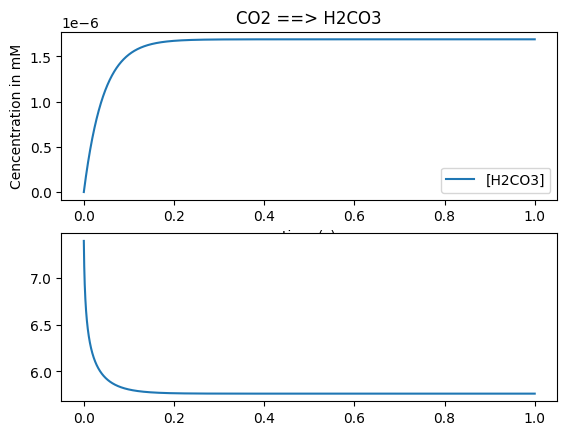

final values:
CO2: 0.00
H2CO3: 0.00
k = 0.0016956521739130434
Reaction reach equilibrium within 1.0% at 0.00s


In [5]:

start_proton = pH_to_proton(start_pH)
pH_list = np.vstack((AB[:,0], proton_to_pH(AB[:,2]+start_proton))).T



fig, ax = plt.subplots(2,1)
#ax.plot(AB[:,0], AB[:,1], label=f'[{A_name}]')
ax[0].plot(AB[:,0], AB[:,2], label=f'[{B_name}]')
ax[0].legend(loc='lower right' )
ax[0].set(xlabel='time (s)', ylabel='Cencentration in mM', title=f"{A_name} ==> {B_name}")

ax[1].plot(pH_list[:,0], pH_list[:,1], label= "pH")

plt.show()
print(f"final values:\n{A_name}: {AB[-1][1]:.2f}\n{B_name}: {AB[-1][2]:.2f}\nk = {k_reaction}")
tolerance = 0.01
eq_time = get_eq_point(AB, equilibrium_point, tolerance)
print(f"Reaction reach equilibrium within {tolerance*100}% at {eq_time[2]:.2f}s")